### Importing Necessary Dependencies

In [194]:
import numpy as np  # Importing the numpy library for numerical operations
import pandas as pd  # Importing the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing the matplotlib library for data visualization
from sklearn.model_selection import train_test_split as tts  # Importing train_test_split function from sklearn.model_selection module for splitting data into training and testing sets
from sklearn.datasets import load_breast_cancer  # Importing the breast cancer dataset from sklearn.datasets module
import tensorflow as tf  # Importing TensorFlow library for deep learning
tf.random.set_seed(5)  # Setting the random seed for reproducibility
from tensorflow import keras  # Importing the Keras module from TensorFlow for building and training deep learning models
from sklearn.preprocessing import StandardScaler  # Importing the StandardScaler class from sklearn.preprocessing module for feature scaling


### Loading The Dataset

In [195]:
_data = load_breast_cancer()  # Load the breast cancer dataset using the load_breast_cancer() function from sklearn.datasets module

In [196]:
print(f"Features : {_data.data}\n")  # Print the features of the breast cancer dataset
print(f"Target : {_data.target}\n")  # Print the target values of the breast cancer dataset
print(f"Feature names : {_data.feature_names}")  # Print the names of the features in the breast cancer dataset

Features : [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

Target : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1

In [197]:
df = pd.DataFrame(_data.data, columns=_data.feature_names)  # Create a DataFrame using the features of the breast cancer dataset
df.head()  # Display the first few rows of the DataFrame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [198]:
df["target"] = _data.target  # Add a new column called "target" to the DataFrame and assign it the values from the target variable
df.sample(10)  # Display a random sample of 10 rows from the DataFrame


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
149,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.013290,0.1473,0.05580,...,22.46,97.19,725.9,0.09711,0.1824,0.15640,0.06019,0.2350,0.07014,1
357,13.87,16.21,88.52,593.7,0.08743,0.05492,0.01502,0.020880,0.1424,0.05883,...,25.58,96.74,694.4,0.11530,0.1008,0.05285,0.05556,0.2362,0.07113,1
171,13.43,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.034380,0.1598,0.05671,...,29.87,116.60,993.6,0.14010,0.1546,0.26440,0.11600,0.2884,0.07371,0
31,11.84,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.051820,0.2301,0.07799,...,28.12,119.40,888.7,0.16370,0.5775,0.69560,0.15460,0.4761,0.14020,0
475,12.83,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.030780,0.1705,0.05913,...,19.35,93.22,605.8,0.13260,0.2610,0.34760,0.09783,0.3006,0.07802,1
387,13.88,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,0.1607,0.05474,...,19.97,99.66,745.3,0.08484,0.1233,0.10910,0.04537,0.2542,0.06623,1
34,16.13,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.077520,0.1998,0.06515,...,27.26,132.70,1261.0,0.14460,0.5804,0.52740,0.18640,0.4270,0.12330,0
336,12.99,14.23,84.08,514.3,0.09462,0.09965,0.03738,0.020980,0.1652,0.07238,...,16.91,87.38,576.0,0.11420,0.1975,0.14500,0.05850,0.2432,0.10090,1
469,11.62,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.055640,0.1957,0.07255,...,25.40,88.14,528.1,0.17800,0.2878,0.31860,0.14160,0.2660,0.09270,1
477,13.90,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.013390,0.1813,0.05536,...,21.80,101.20,718.9,0.09384,0.2006,0.13840,0.06222,0.2679,0.07698,1


In [199]:
df.info()  # Display a statistical summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [200]:
df.isnull().sum()  # Check for missing values in each column of the DataFrame

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [201]:
print(f"Dataframe shape : {df.shape}")  # Print the shape of the DataFrame
df["target"].value_counts()  # Count the occurrences of each unique value in the "target" column


Dataframe shape : (569, 31)


1    357
0    212
Name: target, dtype: int64

#### 1 ---> Benign
#### 0 ---> Malignant

In [202]:
df.groupby("target").mean()  # Group the DataFrame by the unique values in the "target" column and calculate the mean for each group

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [203]:
x = df.drop(columns="target")  # Create a new DataFrame 'x' by dropping the 'target' column from the original DataFrame
y = df["target"]  # Create a new Series 'y' containing the values from the 'target' column

print(f"Feature shape : {x.shape}")  # Print the shape of the 'x' DataFrame
print(f"Target shape : {y.shape}")  # Print the shape of the 'y' Series

Feature shape : (569, 30)
Target shape : (569,)


In [204]:
# Splitting the data into training and testing sets
# x: input features
# y: target variable
# test_size=0.2: allocating 20% of the data for testing
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2, random_state=25)

In [205]:
# Printing the shape of xtrain (input features for training)
print(f"xtrain shape: {xtrain.shape}")

# Printing the shape of ytrain (target variable for training)
print(f"ytrain shape: {ytrain.shape}")

# Printing the shape of xtest (input features for testing)
print(f"xtest shape: {xtest.shape}")

# Printing the shape of ytest (target variable for testing)
print(f"ytest shape: {ytest.shape}")

xtrain shape: (455, 30)
ytrain shape: (455,)
xtest shape: (114, 30)
ytest shape: (114,)


### Standardizing the data

In [206]:
# Creating an instance of the StandardScaler
scaler = StandardScaler()

# Standardizing the features in the xtrain dataset
xtrain_std = scaler.fit_transform(xtrain)

# Standardizing the features in the xtest dataset
xtest_std = scaler.fit_transform(xtest)

### Building the Neural Network

In [207]:
# Creating a sequential model
model = keras.Sequential([
    # Flattening the input shape (30,) to a 1D array
    keras.layers.Flatten(input_shape=(30,)),
    # Adding a dense layer with 20 units and ReLU activation
    keras.layers.Dense(20, activation='relu'),
    # Adding another dense layer with 20 units and ReLU activation
    keras.layers.Dense(20, activation='relu'),
    # Adding the output layer with 2 units and sigmoid activation
    keras.layers.Dense(2, activation="sigmoid")
])

In [208]:
# Compiling the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

The compile method is called on the model object to configure the model for training.


The optimizer parameter is set to "adam", which is a popular optimization algorithm for training neural networks. 
It adapts the learning rate during training to improve convergence.


The loss parameter is set to "sparse_categorical_crossentropy". This loss function is commonly used for multi-class classification problems, 
where the target variable (y) is represented as integers.


The metrics parameter is set to ["accuracy"]. This specifies that you want to track the accuracy metric during training and evaluation,
which represents the fraction of correctly classified samples.

### Training the Neural Network

In [209]:
# Training the model
history = model.fit(np.array(xtrain_std), np.array(ytrain), validation_split=0.2, epochs=15)

Epoch 1/15
12/12 [==============================] - 1s 13ms/step - loss: 0.5852 - accuracy: 0.7610 - val_loss: 0.5657 - val_accuracy: 0.7473
Epoch 2/15
12/12 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.8736 - val_loss: 0.4393 - val_accuracy: 0.8352
Epoch 3/15
12/12 [==============================] - 0s 3ms/step - loss: 0.3130 - accuracy: 0.9066 - val_loss: 0.3555 - val_accuracy: 0.8571
Epoch 4/15
12/12 [==============================] - 0s 3ms/step - loss: 0.2467 - accuracy: 0.9286 - val_loss: 0.2935 - val_accuracy: 0.9011
Epoch 5/15
12/12 [==============================] - 0s 3ms/step - loss: 0.2027 - accuracy: 0.9396 - val_loss: 0.2425 - val_accuracy: 0.9231
Epoch 6/15
12/12 [==============================] - 0s 3ms/step - loss: 0.1694 - accuracy: 0.9533 - val_loss: 0.2004 - val_accuracy: 0.9231
Epoch 7/15
12/12 [==============================] - 0s 3ms/step - loss: 0.1451 - accuracy: 0.9698 - val_loss: 0.1673 - val_accuracy: 0.9341
Epoch 8/15
12/12 [=

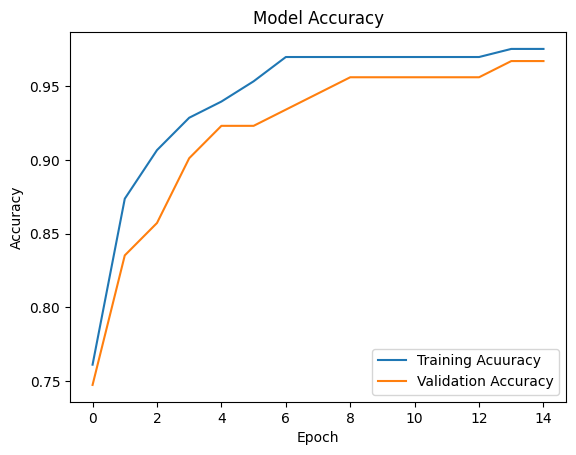

In [210]:
# Visualize the accuracy 
plt.plot(history.history['accuracy'], label='Training Acuuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

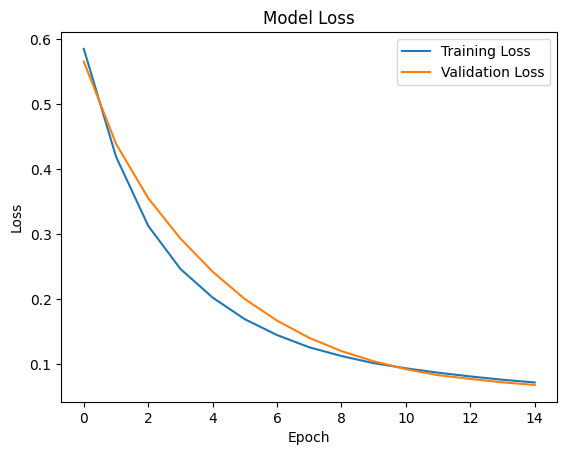

In [211]:
# Visualize the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model Evaluation Using Test data

In [212]:
# Evaluating the model on the test data
loss, accuracy = model.evaluate(np.array(xtest_std), np.array(ytest))
# Printing the model's accuracy on unseen data
print(f"Model Accuracy on unseen data: {accuracy}")

4/4 [==============================] - 0s 2ms/step - loss: 0.1497 - accuracy: 0.9474
Model Accuracy on unseen data: 0.9473684430122375


In [213]:
ypred = model.predict(xtest_std) # gives the prediction probability of each class for that data point

4/4 [==============================] - 0s 1ms/step


In [214]:
print(f"ypred shape : {ypred.shape}")
print(f"First prediction : {ypred[0]}")

ypred shape : (114, 2)
First prediction : [0.00474114 0.97557825]


In [215]:
# converting the prediction probabilities to class label
ypred_labels = [np.argmax(i) for i in ypred] # np.argmax() returns the index of the maximum value
print(f"First 20 predictions : {ypred_labels[:20]}")

First 20 predictions : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0]


In [216]:
# Create an empty DataFrame
comparison = pd.DataFrame()
# Map the actual and predicted labels to their corresponding class names
actual_labels = ['Benign' if label == 1 else 'Malignant' for label in ytest]
predicted_labels = ['Benign' if label == 1 else 'Malignant' for label in ypred_labels]
# Add the mapped labels to the DataFrame
comparison["Actual Label"] = actual_labels
comparison["Predicted Label"] = predicted_labels
comparison.sample(10)

,Actual Label,Predicted Label
62,Malignant,Malignant
49,Benign,Benign
12,Malignant,Malignant
77,Benign,Benign
106,Malignant,Malignant
15,Benign,Malignant
95,Benign,Benign
73,Benign,Benign
54,Malignant,Malignant
84,Malignant,Malignant
